# Kaggle Practice Competition (Titanic Survival Prediction)

In this competition, the goal is ultimately to learn the basics of data science and apply machine learning algorithms for binary classification

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We will be using the given data from Kaggle regarding the people in tragic Titanic accident. Here are the summary of each fields as given on the site:
Data Dictionary

<B>Variable&nbsp;&nbsp;&nbsp;&nbsp;Definition&nbsp;&nbsp;&nbsp;&nbsp;Key</B> <br>
survival-->Survival	
 0 = No, 1 = Yes<br>
pclass-->Ticket class	
1 = 1st, 2 = 2nd, 3 = 3rd
<br>
sex-->Gender	<br>
Age-->Age in years	<br>
sibsp--># of siblings / spouses aboard the Titanic	<br>
parch--># of parents / children aboard the Titanic	<br>
ticket-->Ticket number	<br>
fare-->Passenger fare	<br>
cabin-->Cabin number	<br>
embarked-->Port of Embarkation<br><br>

#### Variable Notes

pclass: A proxy for socio-economic status
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
df = pd.read_csv("C:/Users/Kevin.Rotairo/Documents/Dataset/Kaggle/Titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### We have some columns with numberical values which we would like to be treated as categorical such as "Survived, Pclass." 

In [7]:
df["Survived"] = df["Survived"].astype('category')
df["Pclass"] = df["Pclass"].astype('category')

### Check for frequency and count of each column using pd.describe(include = "all")

In [8]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0.0,3.0,"Daly, Mr. Eugene Patrick",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can see that we don't know the age of ~200 people and that we only know 204 out of 891 cabin information. There are also 3 missing information in the "Embarked" field. 549 out of 891 people also died in the accident. 

### Let's start analyzing each categorical field starting with the "PClass field"

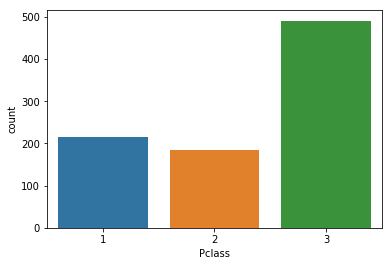

In [37]:
sns.countplot(df.Pclass)

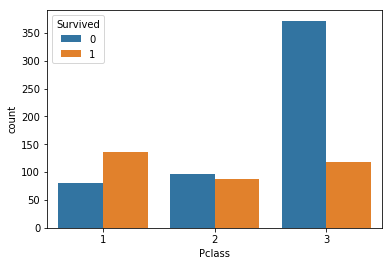

In [38]:
sns.countplot(df.Pclass, hue = df.Survived)

We would immediately notice that there is a significant difference on your chances of survival if you happen to be in the lower class. We could further derive the chances by analyzing each class.

In [25]:
for i in range(1, 4):
    print("Survival chance for group "+ str(i))
    print(str((df[(df["Pclass"]==i) & (df["Survived"]==1)].Pclass.count()/df[df["Pclass"]==i].Pclass.count())*100)+"%")



Survival chance for group 1
62.962962963%
Survival chance for group 2
47.2826086957%
Survival chance for group 3
24.2362525458%


### Let us then analyze the name field

We can extract all the titles given to the names and see if we can find out something significant for each label

In [42]:
df.Name.str.extract("\w+, (\w+). ",expand = False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Don           1
Lady          1
Jonkheer      1
Capt          1
Ms            1
th            1
Mme           1
Name: Name, dtype: int64

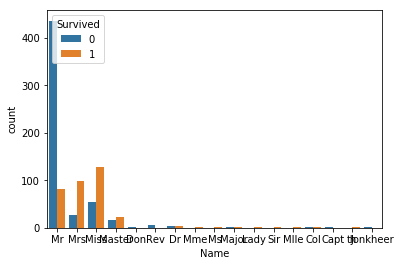

In [35]:
sns.countplot(df.Name.str.extract("\w+, (\w+). ",expand = False), hue = df.Survived)

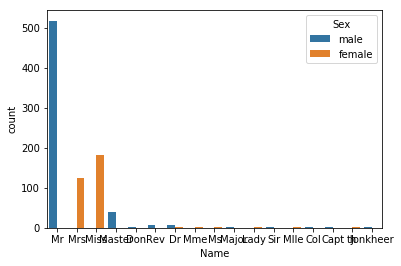

In [44]:
sns.countplot(df.Name.str.extract("\w+, (\w+). ",expand = False), hue = df.Sex)

Majority of the passengers were entitled as Mr. and we can verify that the title was valid since all of them are actually male. The females are generally divided into Mrs. and Miss titles and there is a small chunk of males who are labeled as Master

## Let us now analyze the gender field

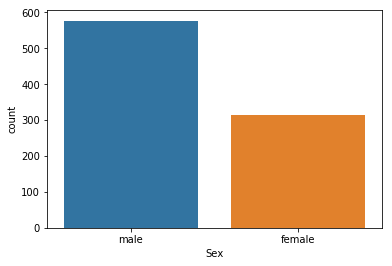

In [47]:
sns.countplot(df.Sex)

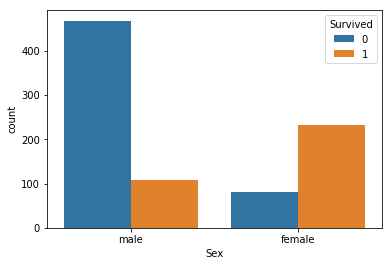

In [46]:
sns.countplot(df.Sex, hue = df.Survived)

There is almost twice the number of females as there are males and we can see that the likelihood that you survived is based very different on the two. only about 20% of the males survived while about 60%+ of females survived

### Let's look into the Age field

Let's look into blank age field and hopefully find something that we can relate their age into

In [50]:
df[df.Age.isnull()].describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,177.000000,177.0,177.0,177,177,0.0,177.000000,177.000000,177,177.000000,19,177
unique,NaN,2.0,3.0,177,2,NaN,NaN,NaN,155,NaN,19,3
top,NaN,0.0,3.0,"Slocovski, Mr. Selman Francis",male,NaN,NaN,NaN,CA. 2343,NaN,F E69,S
freq,NaN,125.0,136.0,1,124,NaN,NaN,NaN,7,NaN,1,90
mean,435.581921,NaN,NaN,NaN,NaN,NaN,0.564972,0.180791,NaN,22.158567,NaN,NaN
std,250.552901,NaN,NaN,NaN,NaN,NaN,1.626316,0.534145,NaN,31.874608,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,230.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,7.750000,NaN,NaN
50%,452.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,8.050000,NaN,NaN
75%,634.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,24.150000,NaN,NaN


We may have enough data to predict their age through a simple linear regression, we can do so later in our feature engineering.

### Looking into the SibSp and Parch field

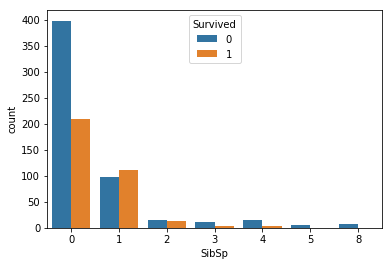

In [56]:
sns.countplot(df.SibSp, hue = df.Survived)

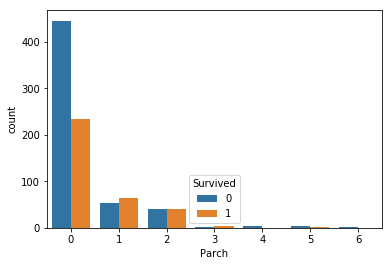

In [63]:
sns.countplot(df.Parch, hue = df.Survived)

We could say that it may matter if you are alone or with someone of your direct family. We can add up the 2 fields to be able to determine the family size

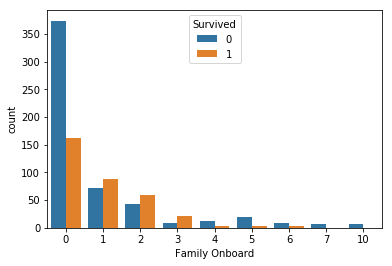

In [62]:
df["Family Onboard"] = df["Parch"] + df["SibSp"]
sns.countplot(df["Family Onboard"], hue = df.Survived)

You may have a slightly higher chance of surviving if you have 1 to 3 people with you. If you either have no one or more >=4 family member with you, you might be in more danger

### Looking into the Embarked column

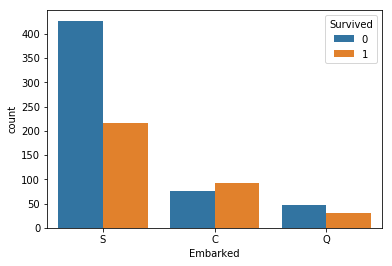

In [64]:
sns.countplot(df.Embarked, hue = df.Survived)

In [65]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Onboard
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


### Readying the data for modeling

In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Onboard
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


I choose to remove the PassengerId, Cabin and Ticket for now. Cabin having so few data and Ticket have so many possible values. 

In [68]:
del df["PassengerId"]
del df["Cabin"]
del df["Ticket"]

Do necessary One-hot encodings and Category to number transformation

In [69]:
df = pd.get_dummies(df, columns=['Pclass'])
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Family Onboard,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,1,0,0,0,0,1
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,0,1,0,0,1


In [83]:
df["Label"] = df.Name.str.extract("\w+, (\w+)[.| ] ")
df.loc[(df["Sex"]=="male")&(df["Label"]!="Master"), "Label"] = "Mr"
df.loc[(df["Label"]=="Mme")|(df["Label"]=="Ms")|(df["Label"]=="Mlle"), "Label" ]= "Miss"
df.loc[(df["Label"]=="Dr")|(df["Label"]=="Lady"), "Label"]="Mrs"
df.Label.value_counts()

C:\Users\Kevin.Rotairo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Mr        537
Miss      186
Mrs       127
Master     40
Name: Label, dtype: int64

In [84]:
del df["Name"]

In [85]:
df = pd.get_dummies(df, columns=['Label'])

In [86]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Family Onboard,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Label_Master,Label_Miss,Label_Mr,Label_Mrs
0,0,male,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,1,0
1,1,female,38.0,1,0,71.2833,1,1,0,0,1,0,0,0,0,0,1
2,1,female,26.0,0,0,7.9250,0,0,0,1,0,0,1,0,1,0,0
3,1,female,35.0,1,0,53.1000,1,1,0,0,0,0,1,0,0,0,1
4,0,male,35.0,0,0,8.0500,0,0,0,1,0,0,1,0,0,1,0


In [88]:
df.Sex = pd.Categorical(df.Sex)
df.Sex = df.Sex.cat.codes
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Family Onboard,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Label_Master,Label_Miss,Label_Mr,Label_Mrs
0,0,1,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,1,0,0,1,0,0,0,0,0,1
2,1,0,26.0,0,0,7.9250,0,0,0,1,0,0,1,0,1,0,0
3,1,0,35.0,1,0,53.1000,1,1,0,0,0,0,1,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,0,1,0,0,1,0,0,1,0


In [89]:
WithAge = df[~df.Age.isnull()]

In [94]:
WithAge.describe(include = "all")
del WithAge["Survived"]
WithAge_Target = WithAge["Age"]
del WithAge["Age"]

In [95]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(WithAge, WithAge_Target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)